# Multi Layer Perceptron cho bài toán hồi quy

## I. Chuẩn bị dữ liệu

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array, 
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data), 
        X_scaled_df                       
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu là X_origin là X ban đầu đã được One Hot và X đã được làm sạch, chuẩn hóa.
X = X_final
X_origin = X_encode

In [2]:
X_origin

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int16  
 1   DailyRate                          1470 non-null   int32  
 2   DistanceFromHome                   1470 non-null   int16  
 3   Education                          1470 non-null   int16  
 4   EnvironmentSatisfaction            1470 non-null   int16  
 5   HourlyRate                         1470 non-null   int16  
 6   JobInvolvement                     1470 non-null   int16  
 7   JobLevel                           1470 non-null   int16  
 8   JobSatisfaction                    1470 non-null   int16  
 9   MonthlyIncome                      1470 non-null   int32  
 10  MonthlyRate                        1470 non-null   int32  
 11  NumCompaniesWorked                 1470 non-null   int16

**Ép kiểu dữ liệu**

In [4]:
float_cols = X_origin.select_dtypes(include='float64').columns
X_origin[float_cols] = X_origin[float_cols].astype('int8')


In [5]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int16
 1   DailyRate                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int16
 3   Education                          1470 non-null   int16
 4   EnvironmentSatisfaction            1470 non-null   int16
 5   HourlyRate                         1470 non-null   int16
 6   JobInvolvement                     1470 non-null   int16
 7   JobLevel                           1470 non-null   int16
 8   JobSatisfaction                    1470 non-null   int16
 9   MonthlyIncome                      1470 non-null   int32
 10  MonthlyRate                        1470 non-null   int32
 11  NumCompaniesWorked                 1470 non-null   int16
 12  PercentSalaryHike   

## II. Định nghĩa hàm, lớp

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
LAYERS = [
    (25,),   
    (50,),
    (50, 25), 
    (50, 50),
    (75, 50),
    (100, 75)
]

TEST_SIZES = [0.2, 0.3]

LEARNING_RATES = [0.0005, 0.001]

ALPHAS = [0.01]

OTPS = ['adam']


In [8]:
def plot_true_vs_pred_line(
    y_true,
    y_pred,
    bins=50,
    title="So sánh phân bố y thực và y dự đoán"
):
    import numpy as np
    import matplotlib.pyplot as plt
    
    counts_true, bin_edges = np.histogram(y_true, bins=bins)
    counts_pred, _ = np.histogram(y_pred, bins=bin_edges)
    centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(centers, counts_true, label="Giá trị thực", linewidth=2)
    plt.plot(centers, counts_pred, label="Giá trị dự đoán", linestyle="--", linewidth=2)

    plt.xlabel("Giá trị")
    plt.ylabel("Tần suất")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


In [9]:
def validate(X=None, y=None, command='No comment', std=True):
    global LAYERS, TEST_SIZES, LEARNING_RATES, ALPHAS

    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler

    continuous_data = [
        'DailyRate', 'MonthlyRate',
        'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
    ]
    results = []

    for otp in OTPS:
        for layer in LAYERS:
            for test_size in TEST_SIZES:
                for lr in LEARNING_RATES:
                    for alpha in ALPHAS:
    
                        X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=test_size, random_state=42
                        )
    
                        if std:
                            scaler = StandardScaler()
                            X_train = scaler.fit_transform(X_train[continuous_data])
                            X_test = scaler.transform(X_test[continuous_data])
    
                        model = MLPRegressor(
                            hidden_layer_sizes=layer,
                            learning_rate_init=lr,
                            learning_rate='adaptive',
                            alpha=alpha,
                            max_iter=1000,
                            early_stopping=True,
                            random_state=42,
                            solver=otp
                        )
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_test)
    
                        mae = mean_absolute_error(y_test, y_pred)
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                        r2 = r2_score(y_test, y_pred)
    
                        results.append({
                            "layers": layer,
                            "test_size": test_size,
                            "learning_rate": lr,
                            "alpha": alpha,
                            "MAE": mae,
                            "RMSE": rmse,
                            "R2": r2,
                            "Solver": otp
                        })
    
                        for i in range(3):
                            print()
                        print(
                            f"Layers={layer}, solver = {otp} test_size={test_size}, "
                            f"lr={lr}, alpha={alpha} | "
                            f"RMSE={rmse:.2f}, R2={r2:.3f}"
                        )
    
                        plot_true_vs_pred_line(y_test, y_pred)

    return results


## II. Lựa chọn bài toán hồi quy

Trong phần này, bài toán được xây dựng dưới dạng hồi quy, với mục tiêu dự đoán thu nhập hàng tháng (MonthlyIncome) của nhân viên dựa trên các đặc trưng nhân sự và công việc.

`MonthlyIncome` là một biến liên tục, do đó các mô hình hồi quy được lựa chọn thay vì các mô hình phân loại, nó đại diện cho thu nhập hàng tháng của nhân viên dựa vào các dữ liệu được thu thập trước đó, đây là biến liên tục và phù hợp với bài toán hồi quy.

Ngoài ra biến `MonthlyIncome` có tương quan với nhiều biến khác trong dữ liệu, cụ thể:
![Heatmap tương quan các biến](../assets/image/img_2.png)

Với:
- `Age` (~0.5)
- `JobLevel` (~0.95)
- `TotalWorkingYears` (~0.77)
- `YearAtCompany` (~0.51)
- `YearInCurrentRole` (~0.36)
- Ngoài ra còn nhiều biến khác nữa.

Các biến này phản ánh trực tiếp cơ cấu lương của công ty như:
- Thâm niên càng cao thì thu nhập càng cao.
- Trình độ càng cao, mức lương cao.
- ....


In [10]:
X_reg = X_origin[[col for col in X_origin.columns if col != 'MonthlyIncome']]
y_reg = X_origin['MonthlyIncome']

In [11]:
X_reg.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,24907,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2396,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,16632,...,1,0,0,0,0,0,0,1,0,0


In [12]:
y_reg.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int32

**Trực quan y**

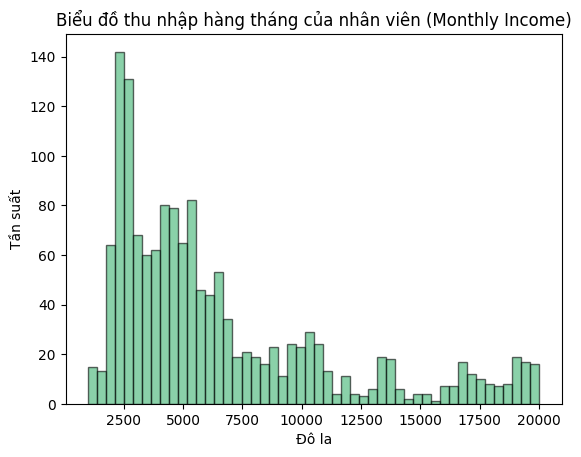

In [13]:
plt.hist(y_reg, bins=50, color="mediumseagreen", edgecolor="black", alpha=0.6)
plt.xlabel("Đô la")
plt.ylabel("Tần suất")
plt.title("Biểu đồ thu nhập hàng tháng của nhân viên (Monthly Income)")
plt.show()

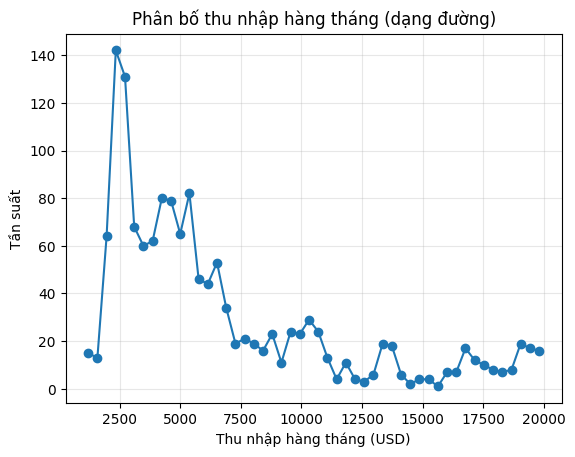

In [14]:
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(y_reg, bins=50)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, counts, marker='o')
plt.xlabel("Thu nhập hàng tháng (USD)")
plt.ylabel("Tần suất")
plt.title("Phân bố thu nhập hàng tháng (dạng đường)")
plt.grid(True, alpha=0.3)
plt.show()


**Nhận xét**

Thu nhập hàng tháng của nhân viên trong bộ dữ liệu IBM dao động từ khoảng 1.000 đến hơn 20.000 USD. Phần lớn nhân viên có mức thu nhập tập trung trong khoảng 1.000–7.000 USD/tháng, trong khi số lượng nhân viên có thu nhập cao hơn giảm dần khi mức thu nhập tăng. Điều này cho thấy phân bố thu nhập có xu hướng lệch trái, phù hợp với phân bố thu nhập trong thực tế doanh nghiệp.

Phân bố không đối xứng này có thể ảnh hưởng đến hiệu quả của một số mô hình hồi quy, do đó việc chuẩn hóa hoặc biến đổi dữ liệu là cần thiết trong quá trình huấn luyện.

## III. Dự đoán mô hình

### Dự đoán mô hình với dữ liệu ban đầu đã chuẩn hóa dữ liệu số

Ở đây chúng tôi chạy với dữ liệu gốc ban đầu, chưa được làm sạch, tham số cho mô hình Multi Layer Perceptrons được định nghĩa ở trên,
Ở đây, dữ liệu sẽ được chạy qua pipeline với việc chuẩn hóa tất cả các trường dữ liệu, bao gồm cả dữ liệu dạng categorial (không khuyến khích), việc chạy với dữ liệu chỉ chuẩn hóa dữ liệu liên tục sẽ được trình bày tại các lần thực nghiệm tiếp theo. 




Layers=(25,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8405.00, R2=-2.232


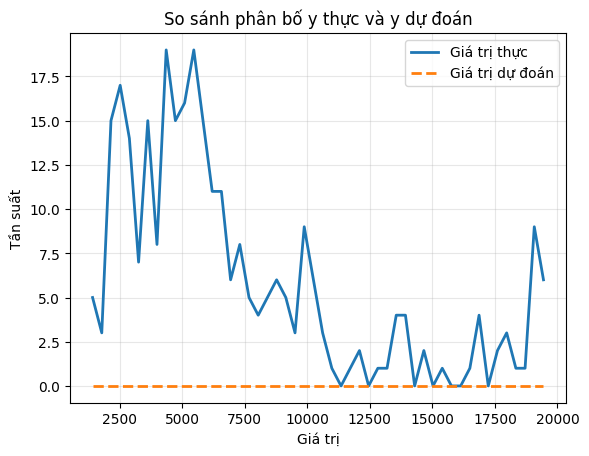




Layers=(25,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=8404.07, R2=-2.232


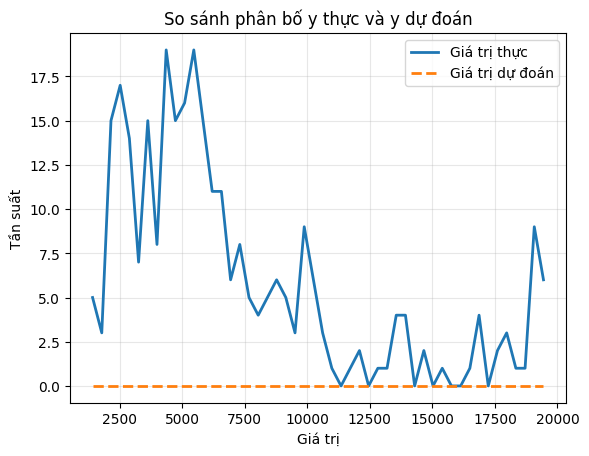




Layers=(25,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8009.28, R2=-2.172


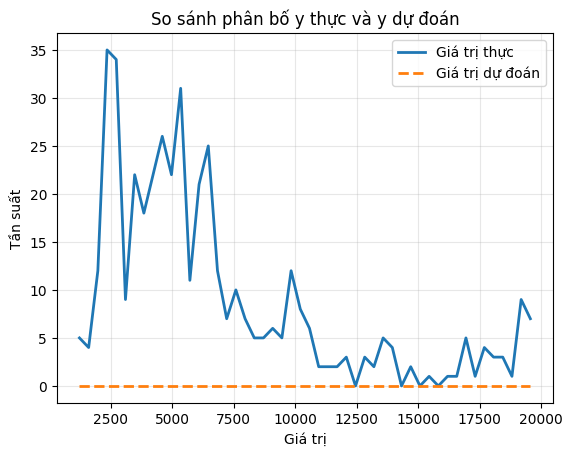




Layers=(25,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=8008.53, R2=-2.171


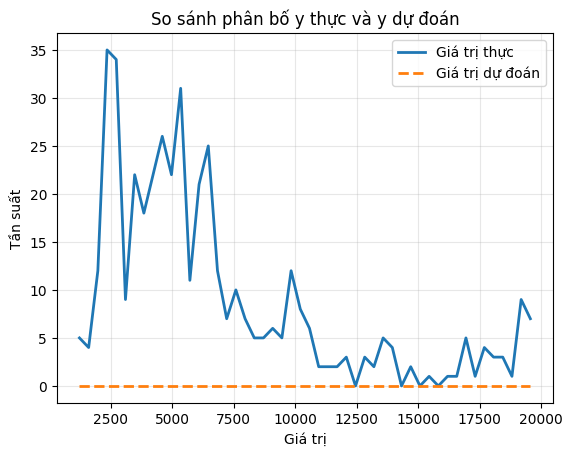




Layers=(50,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8402.32, R2=-2.230


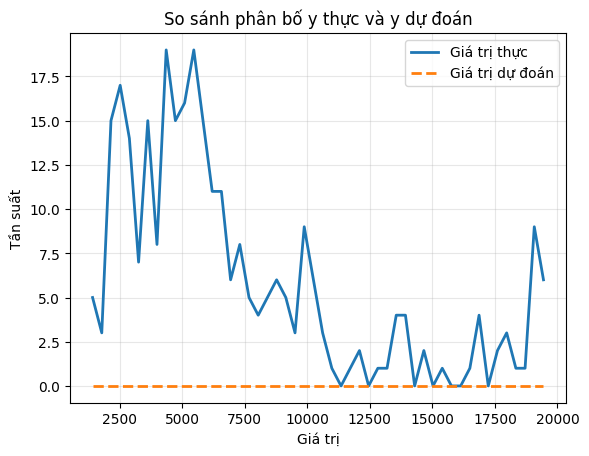




Layers=(50,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=4057.57, R2=0.247


/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


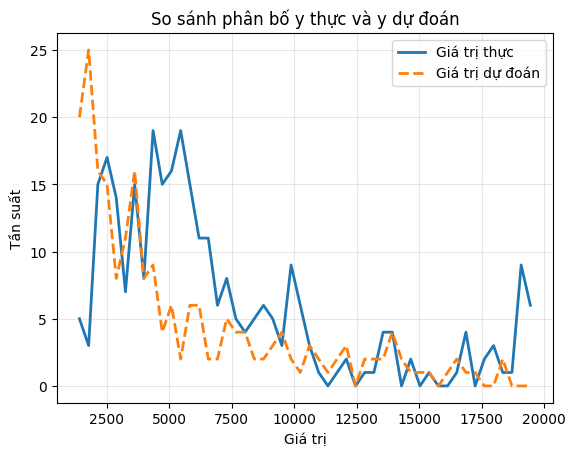




Layers=(50,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8006.76, R2=-2.170


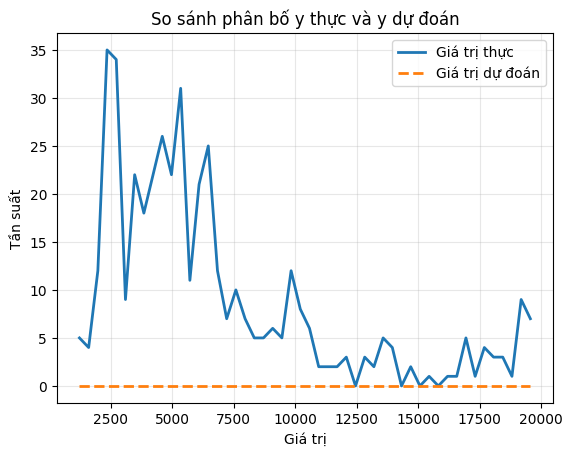




Layers=(50,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=4368.48, R2=0.056


/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


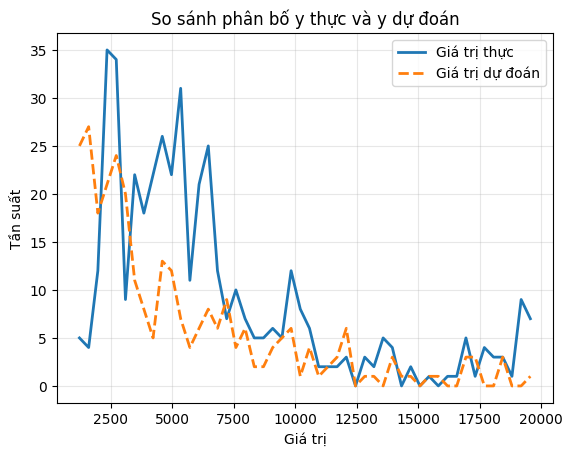




Layers=(50, 25), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1541.31, R2=0.891


/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


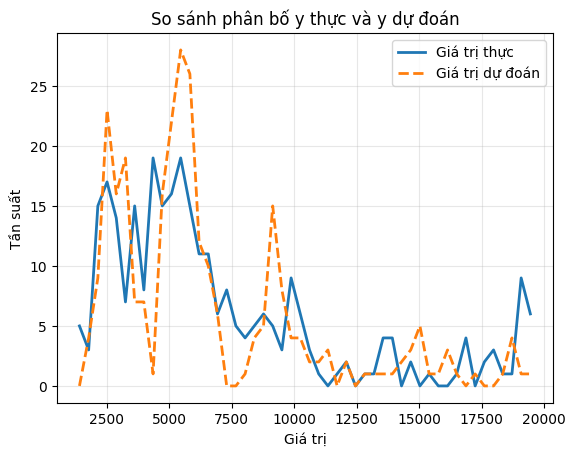




Layers=(50, 25), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1514.45, R2=0.895


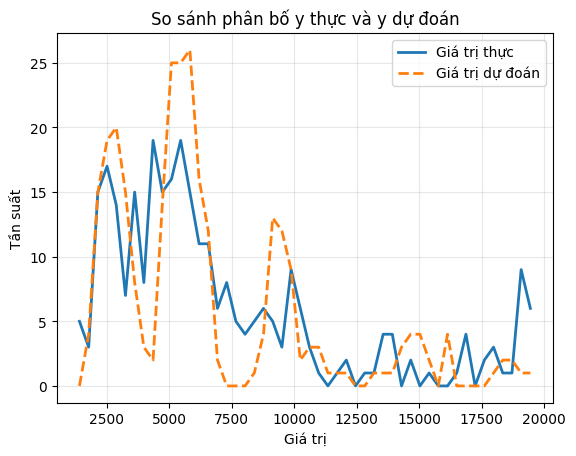




Layers=(50, 25), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1630.46, R2=0.869


/media/trong-thanh/Data/University/Third Year/I/Machine Learning/Project Machine Learning/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


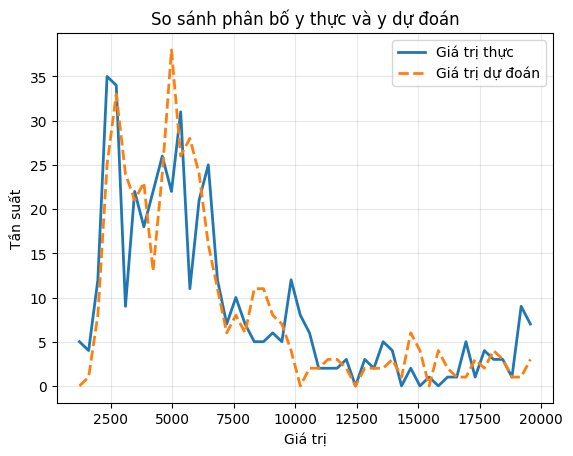




Layers=(50, 25), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1486.81, R2=0.891


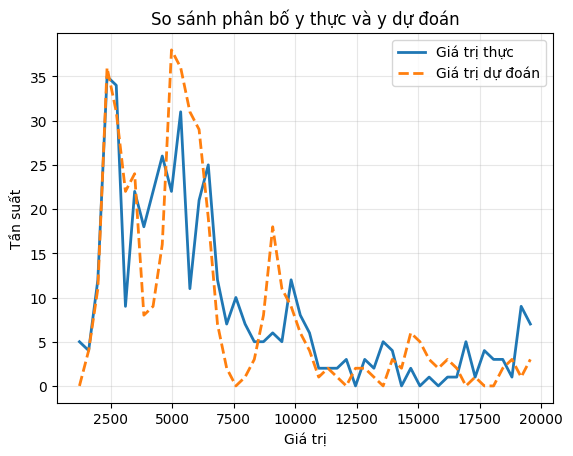




Layers=(50, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1529.11, R2=0.893


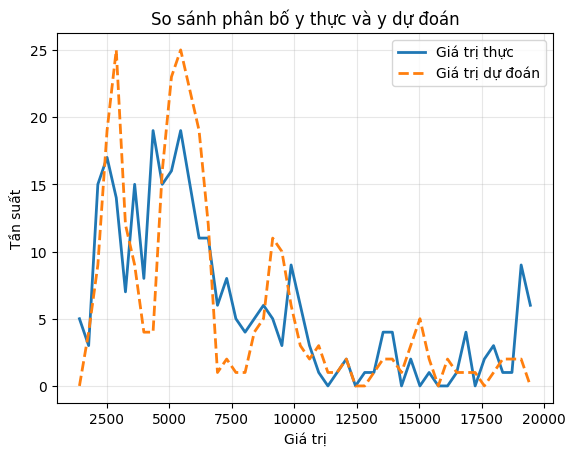




Layers=(50, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1525.48, R2=0.894


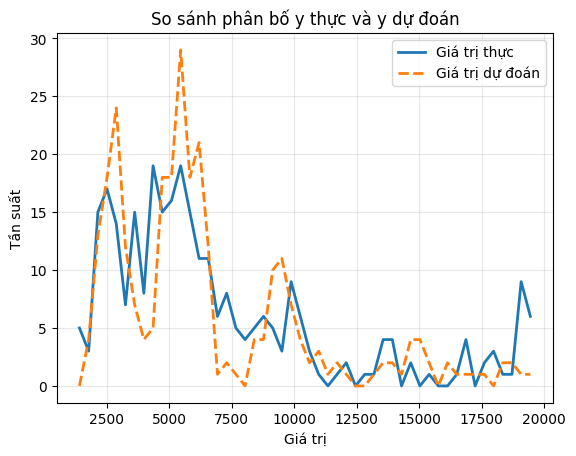




Layers=(50, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1506.39, R2=0.888


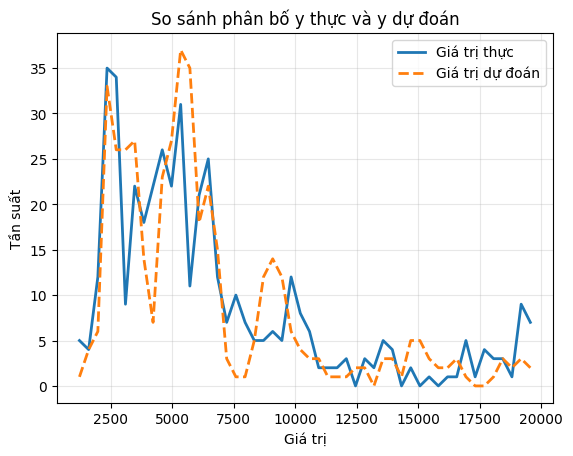




Layers=(50, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1479.57, R2=0.892


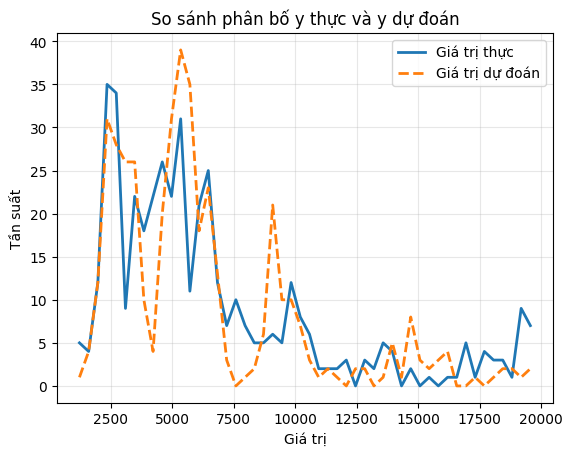




Layers=(75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1535.48, R2=0.892


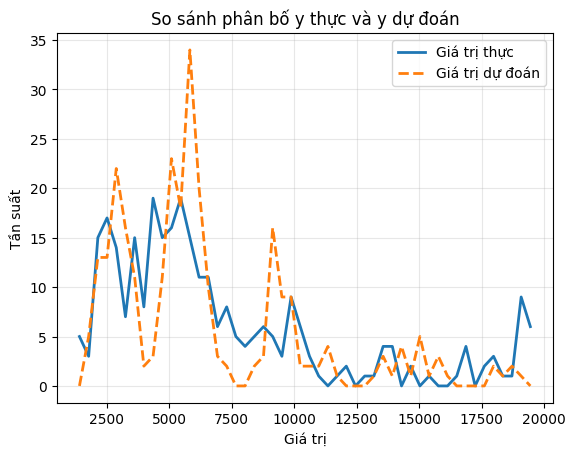




Layers=(75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1543.60, R2=0.891


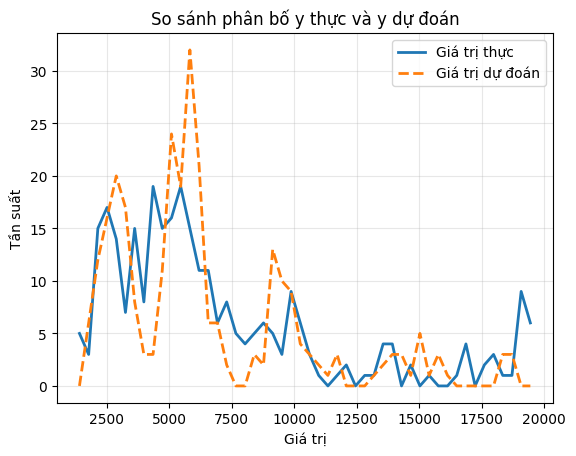




Layers=(75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1496.08, R2=0.889


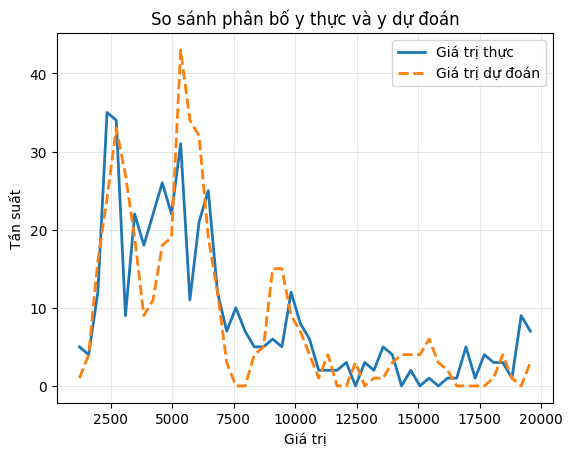




Layers=(75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1495.92, R2=0.889


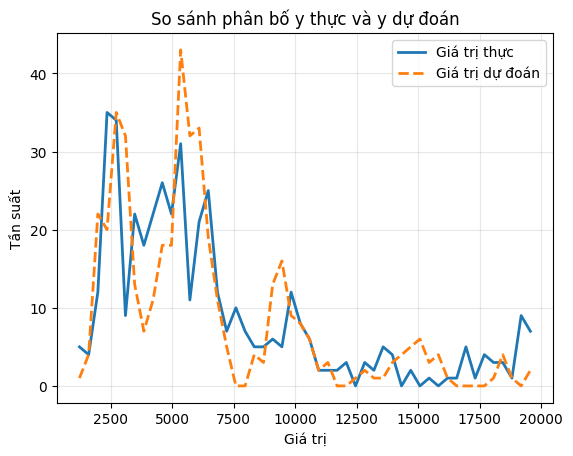




Layers=(100, 75), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1543.41, R2=0.891


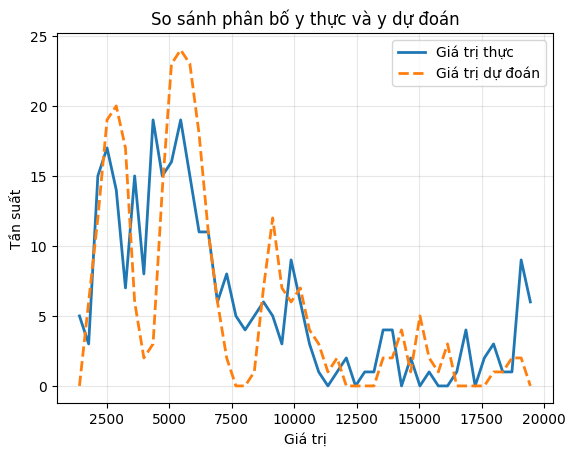




Layers=(100, 75), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1531.33, R2=0.893


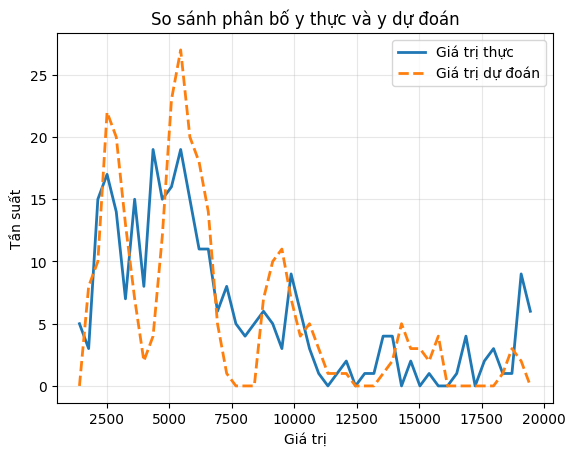




Layers=(100, 75), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1519.25, R2=0.886


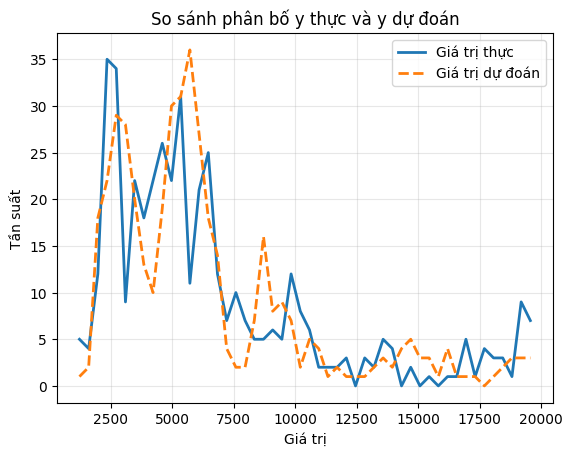




Layers=(100, 75), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1472.52, R2=0.893


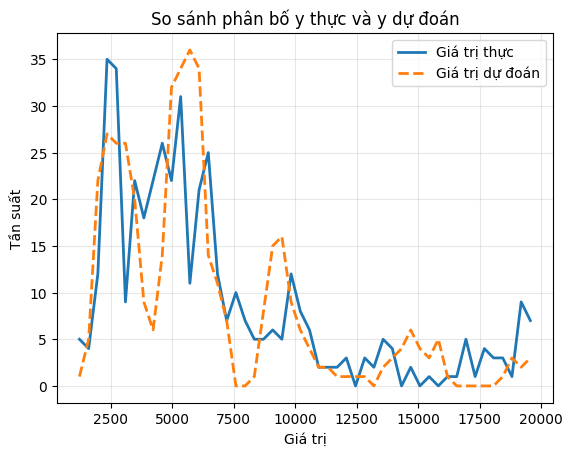

In [15]:
result = validate(X_reg, y_reg)

In [16]:
df = pd.DataFrame(result) 

In [17]:
df

,layers,test_size,learning_rate,alpha,MAE,RMSE,R2,Solver
0,"(25,)",0.2,0.0005,0.01,6984.997680,8405.001857,-2.232337,adam
1,"(25,)",0.2,0.0010,0.01,6984.150476,8404.072895,-2.231623,adam
2,"(25,)",0.3,0.0005,0.01,6627.549783,8009.284991,-2.171699,adam
3,"(25,)",0.3,0.0010,0.01,6626.869414,8008.532352,-2.171103,adam
4,"(50,)",0.2,0.0005,0.01,6982.202931,8402.324488,-2.230279,adam
5,"(50,)",0.2,0.0010,0.01,3300.606937,4057.574953,0.246689,adam
6,"(50,)",0.3,0.0005,0.01,6624.857619,8006.755365,-2.169696,adam
7,"(50,)",0.3,0.0010,0.01,3537.128171,4368.482342,0.056448,adam
8,"(50, 25)",0.2,0.0005,0.01,1163.803851,1541.310322,0.891302,adam
9,"(50, 25)",0.2,0.0010,0.01,1150.414474,1514.447098,0.895058,adam


**Nhận xét:**

Ở đây chúng tôi sử dụng 3 cách để đánh giá mô hình:
- R-squared (R2) cho biết mô hình có thể giải thích được bao nhiêu % sự biến thiên của dữ liệu thực tế. Nếu R2 = 1 thì mô hình hòan hảo, mô hình dự đoán chính xác 100% mọi điểm dữ liệu. Với R2 = 0, mô hình dự đoán bằng giá trị trung bình của dữ liệu, qua đó có thể thấy được là mô hình không học được gì từ dữ liệu. Còn nếu R2 < 0 thì thấy được là mô hình rất tệ, tệ hơn cả việc đoán bừa dữ liệu.
- MAE (Mean Absolute Error) là sai số tuyệt đối trung bình, thể hiện mức độ sai số của các lần dự đoán so với dữ liệu trung bình của tập dữ liệu.
- RMSE (Root Mean Squared Error) đây là phiên bản dễ đọc hơn của MSE (Mean Square Error) vì sai số ban đầu nếu lớn, thì khi bình phương lại càng lớn hơn, ví dụ trong trường hợp này, nếu sai số của mức lương là đô la, thì sai số bình phương sẽ là đô la bình phương. Để giải quyết thì ta chỉ cần căn bậc 2 nó là được.

Với 1 tầng ẩn mô hình MLP gần như không thể nào nhận dạng được dữ liệu phi tuyến này nên cho kết quả rất tệ phần lớn kết quả R2 Score đều nhỏ hơn 0, chỉ một vài trường hợp cho kết quả xấp xỉ 0, MAE, RMSE cho kết quả rất lớn. Về nghĩa thực tế thì mô hình không dự đoán được chính xác, sai số trong dự đoán thực tế lên đến khoảng 8000 đô la. Ví dụ lương của người công nhân bình thường còn có thể cao hơn lương của Developer thì điều này là phi thực tế.

Từ với 2 tầng ẩn, mô hình đã dự đoán tốt hơn đáng kể, từ nhỏ hơn 0 hoặc xấp xỉ 0, lên hơn 0.85, thậm chí lên gần 0.9. MAE, RMSE cũng giảm đi khá nhiều từ 8000, 9000 đô xuống còn khoảng 1400, 1500 đô la thực tế hơn phần trên.